# **Credit Card Lead Prediction**

# *PROBLEM_STATEMENT :*

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (ChannelCode,Vintage, 'AvgAsset_Value etc.)

# *COLUMNS_Details*

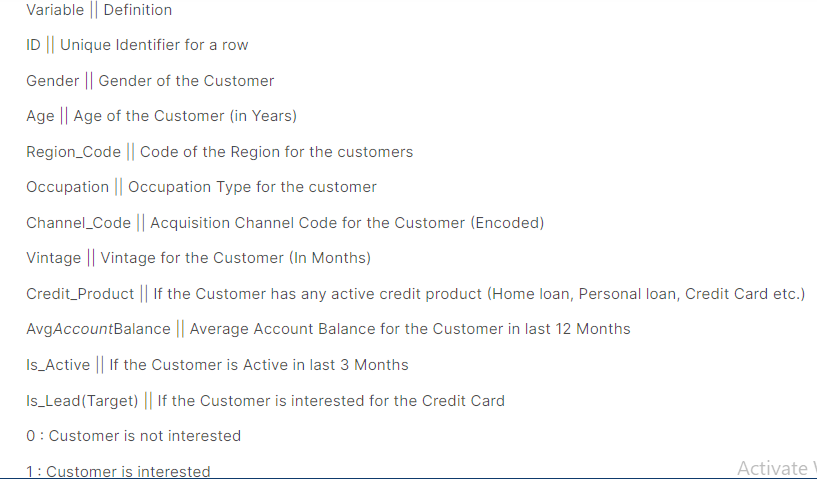

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('../input/analytics-vidhya-job-a-thon-may-2021/train_s3TEQDk.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
for cols in df.columns:
  print("{}: Unique -> {}, Count: {}".format(cols,df[cols].unique(),(df[cols].nunique())))

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.groupby('Gender').count()

In [ ]:
df['Is_Lead'].value_counts()

In [ ]:
df.isnull().count()

In [ ]:
df.groupby('Region_Code').count()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=df,hue='Is_Lead')

In [ ]:
sns.pairplot(df,hue='Is_Lead')

In [ ]:
sns.countplot('Is_Active',data=df,hue='Is_Lead')

In [ ]:
sns.countplot('Is_Active',data=df,hue='Gender')

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='coolwarm')

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_en=LabelEncoder()

In [ ]:
df['Gender']=lb_en.fit_transform(df['Gender'])
df['Is_Active']=lb_en.fit_transform(df['Is_Active'])
df['Channel_Code']=lb_en.fit_transform(df['Channel_Code'])
df['Region_Code']=lb_en.fit_transform(df['Region_Code'])
df['Occupation']=lb_en.fit_transform(df['Occupation'])

#Columns :Credit_Product have ***nan*** Values 

In [ ]:
df['Credit_Product'].value_counts()

In [ ]:
df['Credit_Product'].isna().sum()

In [ ]:
df.Credit_Product.replace(np.nan,'No',regex = True,inplace=True)

In [ ]:
df['Credit_Product'].isna().sum()

In [ ]:
df['Credit_Product']=lb_en.fit_transform(df['Credit_Product'])

In [ ]:
df

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Purples')

In [ ]:
df.head()

In [ ]:
#Independent and Dependent features 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print("Shape of Independent features :",X.shape)
print("Shape of Dependent features :",y.shape)

In [ ]:
df['Is_Lead'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
#sacling the dataset
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_Scale_train=Scaler.fit_transform(X_train)
X_Scale_test=Scaler.fit_transform(X_test)

In [ ]:
#Balancing the target
from imblearn.under_sampling import RandomUnderSampler
sampler=RandomUnderSampler(random_state=1)
X_bal,y_bal =sampler.fit_resample(X_Scale_train,y_train)

In [ ]:
np.count_nonzero(y_bal)

In [ ]:
y_bal.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_Lr=Pipeline([('scaler1',StandardScaler()),
                  ('Lr',LogisticRegression())])
pipe_Knn=Pipeline([('scaler2',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_SVC=Pipeline([('scaler3',StandardScaler()),
                   ('SVC',SVC())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RF',RandomForestClassifier())])
pipe_DT=Pipeline([('scaler5',DecisionTreeClassifier())])

In [ ]:
pipeline=[pipe_Lr,pipe_Knn,pipe_SVC,pipe_RF,pipe_DT]

In [ ]:
pipe_dict={0:'Logistic_Regression',1:'KNeighborsClassifier',2:'SVC',3:'Random_Forest_Classifier',4:'Decision_Tree'}

In [ ]:
for pipe in pipeline:
  pipe.fit(X_bal,y_bal)

In [ ]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_Scale_test,y_test)))

Optimising the KNN by finding the nneighbour which have less error:



In [ ]:
error_rate=[]
for i in range(1,40):
  model_Knn=KNeighborsClassifier(n_neighbors=i)
  model_Knn.fit(X_bal,y_bal)
  pred_i=model_Knn.predict(X_Scale_test)
  error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error_rate Vs K_neighbors_values')
plt.xlabel('K_n_value')
plt.ylabel('Error_rate')
plt.plot()

In [ ]:
model_Knn=KNeighborsClassifier(n_neighbors=2)
model_Knn.fit(X_bal,y_bal)
pred_Knn=model_Knn.predict(X_Scale_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,pred_Knn))


Now Hyper-tuning in Random Forest Classification to better accuracy rate :

Using ->Randomised Search Cv

In [ ]:
rf=RandomForestClassifier()

In [ ]:
sorted(rf.get_params().keys())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

The main prameters in Random Forest Search is:

1. 'n_estimators' :no. of tree in ensamble
2. 'max_depth' : max no. of levels allowed
3. 'criterion' : funiction used evaluate the quality of split
4. 'max_features' :max no. features considered while spliting a node
5. 'min_samples_leaf':min no. of sample which can stored in tree while spliting
6. 'min_samples_split' :min no. sample required in a node to cause node split



In [ ]:
parms={
    'criterion':['entropy','gini'],
    'max_depth':[int(x) for x in np.linspace(100,1000,10)],
    'n_estimators':[int(x) for x in np.linspace(100,1000,10)],
    'max_features':['auto','log2','sqrt'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6,8]
}

In [ ]:
rf=RandomizedSearchCV(estimator=rf,param_distributions=parms,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)

In [ ]:
rf.fit(X_bal,y_bal)

In [ ]:
rf.best_params_

In [ ]:
best=rf.best_estimator_
best

In [ ]:
model_rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_rf.fit(X_bal,y_bal)

In [ ]:
pred=model_rf.predict(X_Scale_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,pred))
print('roc_auc:',metrics.roc_auc_score(y_test,pred))

Working on Testing data:

*   Handle NaN
*   Encoding
*   Scaling




In [ ]:
df_Test=pd.read_csv('../input/analytics-vidhya-job-a-thon-may-2021/test_mSzZ8RL.csv')

In [ ]:
df_Test.head()

In [ ]:
X_test_final=df_Test.iloc[:,1:]

In [ ]:
X_test_final.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
X_test_final['Credit_Product'].unique()

In [ ]:
X_test_final['Credit_Product'].isna().sum()

In [ ]:
X_test_final.shape

In [ ]:
X_test_final['Credit_Product'].replace(np.nan,'No',regex=True,inplace=True)

In [ ]:
X_test_final['Credit_Product'].isna().sum()

In [ ]:
Lb_encode=LabelEncoder()

In [ ]:
X_test_final['Channel_Code'] =Lb_encode.fit_transform(X_test_final['Channel_Code'])
X_test_final['Credit_Product'] =Lb_encode.fit_transform(X_test_final['Credit_Product'])
X_test_final['Gender'] =Lb_encode.fit_transform(X_test_final['Gender'])
X_test_final['Is_Active']=Lb_encode.fit_transform(X_test_final['Is_Active'])
X_test_final['Region_Code'] = Lb_encode.fit_transform(X_test_final['Region_Code'])
X_test_final['Occupation']=Lb_encode.fit_transform(X_test_final['Occupation'])

In [ ]:
X_test_final.head()

In [ ]:
Scale =StandardScaler()
X_test_final =Scale.fit_transform(X_test_final)

In [ ]:
X_test_final

In [ ]:
Predicted =model_rf.predict(X_test_final)

In [ ]:
submit =pd.DataFrame({'Id':df_Test['ID'],
                      'Predicted':Predicted})

In [ ]:
submit.head()

In [ ]:
submit.to_csv('Submission.csv',index=False)